In [9]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [10]:
# parameters
training_epochs = 15
batch_size = 100

# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

Label:  0


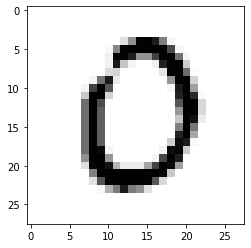

In [21]:
r = random.randint(0, len(mnist_test) - 1)
X_single_data = mnist_test.test_data[r:r + 1].view(28, 28)
Y_single_data = mnist_test.test_labels[r:r + 1]

print('Label: ', Y_single_data.item())
plt.imshow(X_single_data, cmap='Greys', interpolation='nearest')
plt.show()

In [17]:
# MNIST data image of shape 28 * 28 = 784
linear = torch.nn.Linear(784, 10, bias=True)

# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss()    # Softmax is internally computed.
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [12]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print(f'Epoch: {epoch+1:04d}, cost={avg_cost:.9f}')

print('Learning finished')
# Test the model using test sets

Epoch: 0001, cost=0.535344362
Epoch: 0002, cost=0.359271407
Epoch: 0003, cost=0.330902129
Epoch: 0004, cost=0.316359311
Epoch: 0005, cost=0.306837201
Epoch: 0006, cost=0.300135702
Epoch: 0007, cost=0.294904321
Epoch: 0008, cost=0.290784478
Epoch: 0009, cost=0.287124306
Epoch: 0010, cost=0.284305990
Epoch: 0011, cost=0.281839997
Epoch: 0012, cost=0.279688895
Epoch: 0013, cost=0.277635485
Epoch: 0014, cost=0.275747448
Epoch: 0015, cost=0.274387211
Learning finished


In [13]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float()
    Y_test = mnist_test.test_labels

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

Accuracy: 0.8833000063896179
